<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Classification with Python


Estimated time needed: **25** minutes
    

## Objectives

After completing this lab you will be able to:

* Confidently create classification models


In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about the performance of basketball teams. The __cbb.csv__ data set includes performance data about five seasons of 354 basketball teams. It includes the following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|TEAM |	The Division I college basketball school|
|CONF|	The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)|
|G|	Number of games played|
|W|	Number of games won|
|ADJOE|	Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)|
|ADJDE|	Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)|
|BARTHAG|	Power Rating (Chance of beating an average Division I team)|
|EFG_O|	Effective Field Goal Percentage Shot|
|EFG_D|	Effective Field Goal Percentage Allowed|
|TOR|	Turnover Percentage Allowed (Turnover Rate)|
|TORD|	Turnover Percentage Committed (Steal Rate)|
|ORB|	Offensive Rebound Percentage|
|DRB|	Defensive Rebound Percentage|
|FTR|	Free Throw Rate (How often the given team shoots Free Throws)|
|FTRD|	Free Throw Rate Allowed|
|2P_O|	Two-Point Shooting Percentage|
|2P_D|	Two-Point Shooting Percentage Allowed|
|3P_O|	Three-Point Shooting Percentage|
|3P_D|	Three-Point Shooting Percentage Allowed|
|ADJ_T|	Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)|
|WAB|	Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)|
|POSTSEASON|	Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|
|SEED|	Seed in the NCAA March Madness Tournament|
|YEAR|	Season


### Load Data From CSV File  


Let's load the dataset [NB Need to provide link to csv file]


In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%206/cbb.csv')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [3]:
df.shape

(1406, 24)

## Add Column
Next we'll add a column that will contain "true" if the wins above bubble are over 7 and "false" if not. We'll call this column Win Index or "windex" for short. 


In [4]:
df['windex'] = np.where(df.WAB > 7, 'True', 'False')

# Data visualization and pre-processing



Next we'll filter the data set to the teams that made the Sweet Sixteen, the Elite Eight, and the Final Four in the post season. We'll also create a new dataframe that will hold the values with the new column.


In [5]:
df1 = df.loc[df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False


In [6]:
df1['POSTSEASON'].value_counts()

S16    32
E8     16
F4      8
Name: POSTSEASON, dtype: int64

32 teams made it into the Sweet Sixteen, 16 into the Elite Eight, and 8 made it into the Final Four over 5 seasons. 


Lets plot some columns to underestand the data better:


In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-RT23.1

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.08.22 |       h06a4308_0         130 KB  anaconda
    seaborn-0.12.2             |  py310h06a4308_0         494 KB  anaconda
    widgetsnbextension-4.0.5   |  py310h06a4308_0         1.6 MB  anaconda
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2023.12.12~ --> anaconda::ca-certificates-2023.08.22-h06a4308_0 
  seaborn                                         pkgs/main --> anaconda 
  widgetsnbextension                              pkgs/main --> anaconda 



seaborn-0.12.2      

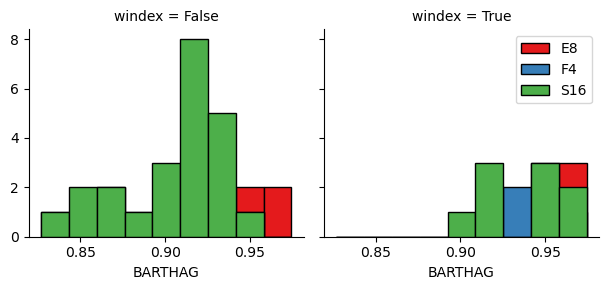

In [8]:
import seaborn as sns

bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

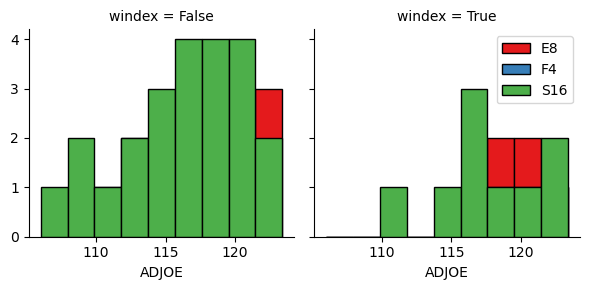

In [9]:
bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJOE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Lets look at how Adjusted Defense Efficiency plots


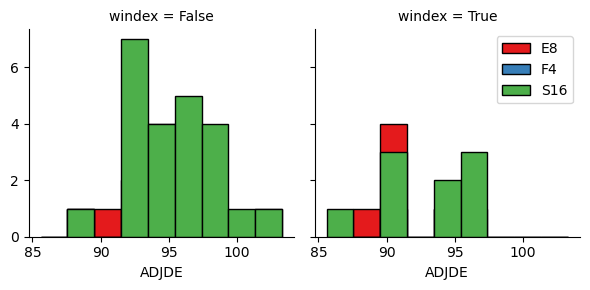

In [10]:
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJDE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that this data point doesn't impact the ability of a team to get into the Final Four. 


## Convert Categorical features to numerical values


Lets look at the postseason:


In [11]:
df1.groupby(['windex'])['POSTSEASON'].value_counts(normalize=True)

windex  POSTSEASON
False   S16           0.605263
        E8            0.263158
        F4            0.131579
True    S16           0.500000
        E8            0.333333
        F4            0.166667
Name: POSTSEASON, dtype: float64

13% of teams with 6 or less wins above bubble make it into the final four while 17% of teams with 7 or more do.


Lets convert wins above bubble (winindex) under 7 to 0 and over 7 to 1:


In [12]:
df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df1.head()

/tmp/wsuser/ipykernel_158/1994287662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,0
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,0


### Feature selection


Let's define feature sets, X:


In [13]:
X = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
X[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0


What are our lables? Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|


In [14]:
y = df1['POSTSEASON'].values
y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

## Normalize Data 


Data Standardization gives data zero mean and unit variance (technically should be done after train test split )


In [15]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.43331874, -1.26140173,  0.28034482,  2.74329908, -2.45717765,
         0.10027963,  0.94171924, -1.16188145, -1.71391372,  0.12750511,
         1.33368704, -0.4942211 , -0.87998988,  0.02784185,  0.00307239,
         0.22576157,  1.59744386, -1.12106011, -1.0448016 ,  0.49716104,
        -0.6882472 ],
       [ 0.40343468,  0.35874728,  0.64758014, -0.90102957,  1.127076  ,
         0.39390887,  0.38123706, -1.29466791, -0.03522254, -0.62979797,
        -1.31585883, -0.68542235,  0.55458056, -0.07167795, -0.0829545 ,
         1.32677295,  0.65081046, -2.369021  ,  0.98050611, -1.14054592,
         1.45296631],
       [ 0.40343468,  1.33083669,  0.87710222, -1.0788017 ,  1.29403598,
         0.72424177, -1.30020946,  0.49794919, -0.16112438, -0.00772758,
        -0.27908001,  0.86808783,  1.31063795, -0.03850468, -1.33034432,
         1.70643205, -0.29582294,  0.47355659,  1.94493836, -1.14054592,
         1.45296631],
       [ 0.40343468,  0.68277708,  0.30329703,  0.63966222

## Training and Validation 


Split the data into Training and Validation data.


In [16]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (44, 21) (44,)
Validation set: (12, 21) (12,)


# Classification 


Now, it is your turn, use the training set to build an accurate model. Then use the validation set  to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



# K Nearest Neighbor(KNN)

<b>Question  1 </b> Build a KNN model using a value of k equals five, find the accuracy on the validation data (X_val and y_val)


You can use <code> accuracy_score</cdoe>


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

# set k to 5
k = 5
#Train model 
neighbors_5 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

#Predict
yhat_knn = neighbors_5.predict(X_val)

#find the accuracy on the validation data (X_val and y_val) using the above yhat_knn
print("Test set Accuracy: ", metrics.accuracy_score(y_val,yhat_knn))

print(classification_report(y_val, yhat_knn ))
#print("Train set Accuracy: ", metrics.accuracy_score(y_train,neighbors_5.predict(X_train)))

Test set Accuracy:  0.6666666666666666
              precision    recall  f1-score   support

          E8       0.33      0.50      0.40         2
          F4       1.00      0.50      0.67         2
         S16       0.75      0.75      0.75         8

    accuracy                           0.67        12
   macro avg       0.69      0.58      0.61        12
weighted avg       0.72      0.67      0.68        12



/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<b>Question  2</b> Determine and print the accuracy for the first 15 values of k on the validation data:


In [18]:
#set Ks one more than the given 15. Range(1,16) only run 1 to 15
Ks = 16
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    
    #Train Model and Predict
    neighbors_= KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neighbors_.predict(X_val)
    mean_acc[n-1]= metrics.accuracy_score(y_val,yhat)
    
    std_acc[n-1] = np.std(yhat==y_val)/np.sqrt(yhat.shape[0])

mean_acc

/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

array([0.33333333, 0.33333333, 0.5       , 0.58333333, 0.66666667,
       0.58333333, 0.58333333, 0.66666667, 0.58333333, 0.58333333,
       0.58333333, 0.5       , 0.58333333, 0.58333333, 0.58333333])

# Decision Tree


The following lines of code fit a <code>DecisionTreeClassifier</code>:


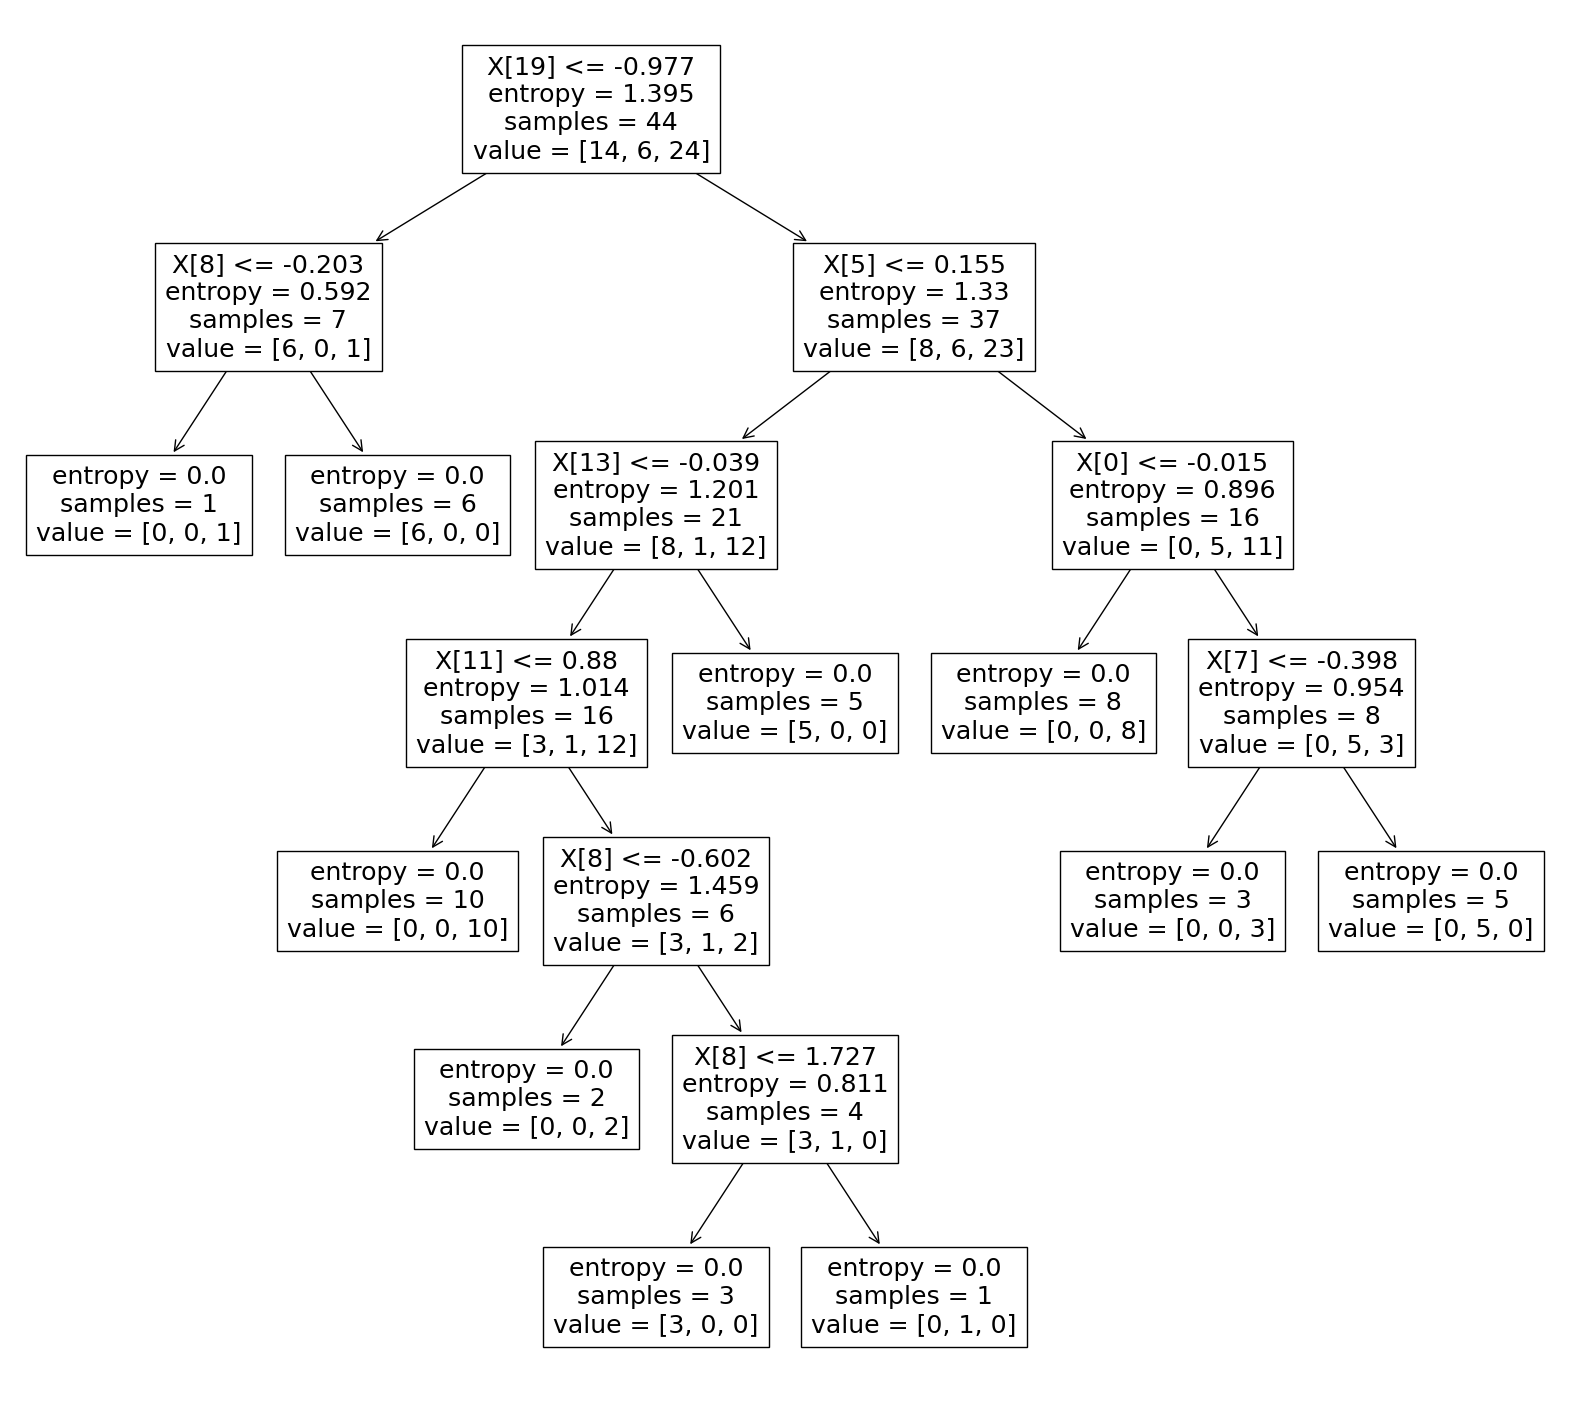

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.model_selection import cross_val_score

finalTree = DecisionTreeClassifier(criterion="entropy", random_state=42)

model = finalTree.fit(X_train, y_train)

plt.figure(figsize=(20,18))
tree.plot_tree(finalTree)
plt.show()

<b>Question  3</b> Determine the minumum   value for the parameter <code>max_depth</code> that improves results 


In [20]:
# To get the best max_depth I will use Pruning
print("Model Score on Test Data: ", model.score(X_val, y_val))

# Perform cost-complexity pruning to find the best alpha
path = finalTree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Remove the maximum alpha which prunes the tree to the root
ccp_alphas = ccp_alphas[:-1]

print(list(ccp_alphas))

# Train and evaluate a decision tree for each alpha value to find the best one
trees = []
for ccp_alpha in ccp_alphas:
    finalTree = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    finalTree.fit(X_train, y_train)
    trees.append(finalTree)

# Use cross-validation to find the best max_depth for the tree with the best alpha
scores = [cross_val_score(finalTree, X_train, y_train, cv=5).mean() for finalTree in trees]
best_tree_index = np.argmax(scores)
best_alpha = ccp_alphas[best_tree_index]

# Retrain the tree with the best alpha and use cross-validation to find the best max_depth
tree_final = DecisionTreeClassifier(ccp_alpha=best_alpha)
tree_final.fit(X_train, y_train)

# Now, evaluate the tree with different max_depth values
max_depth_values = range(1, tree_final.tree_.max_depth + 1)
best_score = 0
best_depth = 0
for depth in max_depth_values:
    finalTree = DecisionTreeClassifier(ccp_alpha=best_alpha, max_depth=depth)
    score = cross_val_score(finalTree, X_train, y_train, cv=5).mean()
    if score > best_score:
        best_score = score
        best_depth = depth

print(f"Best max_depth: {best_depth} with cross-validation score: {best_score}")

# Optionally, evaluate the final model on the test set
tree_optimal = DecisionTreeClassifier(ccp_alpha=best_alpha, max_depth=best_depth)
tree_optimal.fit(X_train, y_train)
y_pred = tree_optimal.predict(X_val)

print(f"Test set accuracy: {accuracy_score(y_val, y_pred)}")

print(classification_report(y_val, y_pred ))

Model Score on Test Data:  0.4166666666666667
[0.0, 0.07375255676901207, 0.09412976022900664, 0.12522215918924853, 0.16291604227901046, 0.1697880678867998]
Best max_depth: 3 with cross-validation score: 0.5666666666666667
Test set accuracy: 0.25
              precision    recall  f1-score   support

          E8       0.00      0.00      0.00         2
          F4       0.00      0.00      0.00         2
         S16       0.60      0.38      0.46         8

    accuracy                           0.25        12
   macro avg       0.20      0.12      0.15        12
weighted avg       0.40      0.25      0.31        12



/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support Vector Machine


<b>Question  4</b> Train the support  vector machine model and determine the accuracy on the validation data for each kernel. Find the kernel (linear, poly, rbf, sigmoid) that provides the best score on the validation data and train a SVM using it.


In [28]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

svm_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kern in svm_kernels:
    x=kern + '_clf'
    x = svm.SVC(kernel=kern)
    x.fit(X_train, y_train)
    yhat = x.predict(X_val)

    print(kern + " Avg F1-score: %.4f" % f1_score(y_val, yhat, average='weighted'))
    print(kern + " Jaccard score: %.4f" % jaccard_score(y_val, yhat,average= 'micro'))
    print(kern + " Accuracy score: %.4f" % accuracy_score(y_val, yhat))
    

linear Avg F1-score: 0.2422
linear Jaccard score: 0.1429
linear Accuracy score: 0.2500
poly Avg F1-score: 0.5333
poly Jaccard score: 0.5000
poly Accuracy score: 0.6667
rbf Avg F1-score: 0.4912
rbf Jaccard score: 0.4118
rbf Accuracy score: 0.5833
sigmoid Avg F1-score: 0.5373
sigmoid Jaccard score: 0.4118
sigmoid Accuracy score: 0.5833


In [27]:
poly_clf = svm.SVC(kernel='poly')
poly_clf.fit(X_train, y_train)
svm_yhat = poly_clf.predict(X_val)

print("Poly Avg F1-score: %.4f" % f1_score(y_val, yhat, average='micro'))
print("Poly Jaccard score: %.4f" % jaccard_score(y_val, yhat, average= 'weighted'))

print(f"Test set accuracy: {accuracy_score(y_val, svm_yhat)}")


print(classification_report(y_val, svm_yhat))


Poly Avg F1-score: 0.5833
Poly Jaccard score: 0.4053
Test set accuracy: 0.6666666666666666
              precision    recall  f1-score   support

          E8       0.00      0.00      0.00         2
          F4       0.00      0.00      0.00         2
         S16       0.67      1.00      0.80         8

    accuracy                           0.67        12
   macro avg       0.22      0.33      0.27        12
weighted avg       0.44      0.67      0.53        12



/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression


<b>Question 5</b> Train a logistic regression model and determine the accuracy of the validation data (set C=0.01)


In [24]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [29]:
yhat_LR = LR.predict(X_val)

print("Macro Logistic Jaccard score: %.4f" % jaccard_score(y_val, yhat_LR, average='macro'))
print("Weighted Logistic Jaccard score: %.4f" % jaccard_score(y_val, yhat_LR, average='weighted'))
print(f"Test set accuracy: {accuracy_score(y_val, yhat_LR)}")

print("Poly Avg F1-score: %.4f" % f1_score(y_val, yhat_LR, average='micro'))

print(classification_report(y_val, yhat_LR))

Macro Logistic Jaccard score: 0.5370
Weighted Logistic Jaccard score: 0.4907
Test set accuracy: 0.5833333333333334
Poly Avg F1-score: 0.5833
              precision    recall  f1-score   support

          E8       0.20      0.50      0.29         2
          F4       1.00      1.00      1.00         2
         S16       0.80      0.50      0.62         8

    accuracy                           0.58        12
   macro avg       0.67      0.67      0.63        12
weighted avg       0.73      0.58      0.62        12



# Model Evaluation using Test set


In [31]:
from sklearn.metrics import f1_score
# for f1_score please set the average parameter to 'micro'
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report

In [32]:
def jaccard_index(predictions, true):
    if (len(predictions) == len(true)):
        intersect = 0;
        for x,y in zip(predictions, true):
            if (x == y):
                intersect += 1
        return intersect / (len(predictions) + len(true) - intersect)
    else:
        return -1

<b>Question  5</b> Calculate the  F1 score and Jaccard score for each model from above. Use the Hyperparameter that performed best on the validation data. **For f1_score please set the average parameter to 'micro'.**


### Load Test set for evaluation 


In [33]:
#test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',error_bad_lines=False)
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',on_bad_lines='skip')
test_df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [34]:
test_df['windex'] = np.where(test_df.WAB > 7, 'True', 'False')
test_df1 = test_df[test_df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
test_Feature = test_df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
test_X=test_Feature
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

/tmp/wsuser/ipykernel_158/3609998696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)


array([[-4.08074446e-01, -1.10135297e+00,  3.37365934e-01,
         2.66479976e+00, -2.46831661e+00,  2.13703245e-01,
         9.44090550e-01, -1.19216365e+00, -1.64348924e+00,
         1.45405982e-02,  1.29523097e+00, -6.23533182e-01,
        -9.31788560e-01,  1.42784371e-01,  1.68876201e-01,
         2.84500844e-01,  1.62625961e+00, -8.36649260e-01,
        -9.98500539e-01,  4.84319174e-01, -6.77003200e-01],
       [ 3.63958290e-01,  3.26326807e-01,  7.03145068e-01,
        -7.13778644e-01,  1.07370841e+00,  4.82633172e-01,
         4.77498943e-01, -1.32975879e+00, -6.86193316e-02,
        -7.35448152e-01, -1.35447914e+00, -8.06829025e-01,
         3.41737757e-01,  4.96641291e-02,  9.40576311e-02,
         1.37214061e+00,  6.93854620e-01, -2.00860931e+00,
         9.80549967e-01, -1.19401460e+00,  1.47709789e+00],
       [ 3.63958290e-01,  1.18293467e+00,  9.31757027e-01,
        -8.78587347e-01,  1.23870131e+00,  7.85179340e-01,
        -9.22275877e-01,  5.27775662e-01, -1.86734575e

In [35]:
test_y = test_df1['POSTSEASON'].values
test_y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

KNN


In [36]:
#Predict
yhat_knn = neighbors_5.predict(test_X)

#find the accuracy on the validation data (test_X and test_y) using the above yhat
print("Accuracy: ", metrics.accuracy_score(test_y,yhat_knn))

print("KNN micro average Jaccard score: %.4f" % jaccard_score(test_y, yhat_knn, average='micro'))
print(classification_report(test_y, yhat_knn))

Accuracy:  0.6285714285714286
KNN micro average Jaccard score: 0.4583
              precision    recall  f1-score   support

          E8       0.48      0.75      0.59        20
          F4       0.50      0.20      0.29        10
         S16       0.77      0.68      0.72        40

    accuracy                           0.63        70
   macro avg       0.59      0.54      0.53        70
weighted avg       0.65      0.63      0.62        70



/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Decision Tree


In [37]:
yhat_pred = tree_optimal.predict(test_X)
print(f"Accuracy: {accuracy_score(test_y, yhat_pred)}")

print("Decision Tree micro average Jaccard score: %.4f" % jaccard_score(test_y, yhat_pred, average='micro'))
print(classification_report(test_y, yhat_pred))

Accuracy: 0.6142857142857143
Decision Tree micro average Jaccard score: 0.4433
              precision    recall  f1-score   support

          E8       0.45      0.75      0.57        20
          F4       0.00      0.00      0.00        10
         S16       0.76      0.70      0.73        40

    accuracy                           0.61        70
   macro avg       0.40      0.48      0.43        70
weighted avg       0.56      0.61      0.58        70



/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/Python-RT23.1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM


In [38]:
svm_yhat = poly_clf.predict(test_X)

print(f"Accuracy: {accuracy_score(test_y, svm_yhat)}")
print("Poly Avg F1-score: %.4f" % f1_score(test_y, svm_yhat, average='micro'))

print("SVM micro average Jaccard score: %.4f" % jaccard_score(test_y, svm_yhat, average='micro'))

print(classification_report(test_y, svm_yhat))

Accuracy: 0.6857142857142857
Poly Avg F1-score: 0.6857
SVM micro average Jaccard score: 0.5217
              precision    recall  f1-score   support

          E8       0.71      0.25      0.37        20
          F4       1.00      0.40      0.57        10
         S16       0.66      0.97      0.79        40

    accuracy                           0.69        70
   macro avg       0.79      0.54      0.58        70
weighted avg       0.72      0.69      0.64        70



Logistic Regression


In [39]:
yhat_LR = LR.predict(test_X)
yhat_LR_prob = LR.predict_proba(test_X)

print(f"Accuracy: {accuracy_score(test_y, yhat_LR )}")

print("Macro Logistic Jaccard score: %.4f" % jaccard_score(test_y, yhat_LR, average='macro'))
print("Poly Avg F1-score: %.4f" % f1_score(test_y, svm_yhat, average='micro'))

print("Log  Loss: : %.2f" % log_loss(test_y,yhat_LR_prob))

print(classification_report(test_y, yhat_LR))

Accuracy: 0.6857142857142857
Macro Logistic Jaccard score: 0.4943
Poly Avg F1-score: 0.6857
Log  Loss: : 1.04
              precision    recall  f1-score   support

          E8       0.52      0.70      0.60        20
          F4       0.83      0.50      0.62        10
         S16       0.78      0.72      0.75        40

    accuracy                           0.69        70
   macro avg       0.71      0.64      0.66        70
weighted avg       0.72      0.69      0.69        70



# Report
You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Accuracy | Jaccard  | F1-score  | LogLoss |
|--------------------|----------|----------|-----------|---------|
| KNN                |     ?    |     ?    |     ?     | NA      |
| Decision Tree      |     ?    |     ?    |     ?     | NA      |
| SVM                |     ?    |     ?    |     ?     | NA      |
| LogisticRegression |     ?    |     ?    |     ?     |     ?   |


Something to keep in mind when creating models to predict the results of basketball tournaments or sports in general is that is quite hard due to so many factors influencing the game. Even in sports betting an accuracy of 55% and over is considered good as it indicates profits.


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">Watson Studio</a>



### Thank you for completing this lab!


## Author

Saeed Aghabozorgi


### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">Joseph Santarcangelo</a>




## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
|2021-04-03   | 2.1  | Malika Singla| Updated the Report accuracy |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |
|   |   |   |   |
|   |   |   |   |


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
